# Naive Bayes and SVM


### Data Set Information:

This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.  

https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

### Mission:
The mission is to create a model that predicts whether the tumor is malignant (type 4) or benign (type 2).



### Attribute Information:

- 1. Sample code number: id number 
- 2. Clump Thickness: 1 - 10 
- 3. Uniformity of Cell Size: 1 - 10 
- 4. Uniformity of Cell Shape: 1 - 10 
- 5. Marginal Adhesion: 1 - 10 
- 6. Single Epithelial Cell Size: 1 - 10 
- 7. Bare Nuclei: 1 - 10 
- 8. Bland Chromatin: 1 - 10 
- 9. Normal Nucleoli: 1 - 10 
- 10. Mitoses: 1 - 10 
- 11. Class: (2 for benign, 4 for malignant)

## Goals of this ipynb
In this notebook we will:
- Import data and name the columns
- Replace missing data
- Instantiate a Navie Bayes and a SVM model
- Utilize cross validation accuracy scores to identify the best model
- Report the confusion matrix and classification report for the best model


In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model 
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.model_selection import cross_val_score
from sklearn import metrics
% matplotlib inline



import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from random import seed  

In [2]:
# Class Class: (2 for benign, 4 for malignant)

df = pd.read_csv('breast-cancer-wisconsin.csv', delimiter=",",header=None, \
                 names = ['ID', 'Clump_Thickness', 'Uniformity_C_Size',\
                          'Uniformity_C_Shape', 'marg_adhesion', 'single_epthelial_size', \
                          'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitosis', \
                          'type'])
df.head()


    

,ID,Clump_Thickness,Uniformity_C_Size,Uniformity_C_Shape,marg_adhesion,single_epthelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,type
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump_Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity_C_Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity_C_Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
marg_adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
single_epthelial_size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
bland_chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
mitosis,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
type,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [4]:
# examine data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                       699 non-null int64
Clump_Thickness          699 non-null int64
Uniformity_C_Size        699 non-null int64
Uniformity_C_Shape       699 non-null int64
marg_adhesion            699 non-null int64
single_epthelial_size    699 non-null int64
bare_nuclei              699 non-null object
bland_chromatin          699 non-null int64
normal_nucleoli          699 non-null int64
mitosis                  699 non-null int64
type                     699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


#### One of the variables is a string and needs to be converted to int

# Convert bare_nuclei from str to float

In [5]:
# There are 16 '?'
df.bare_nuclei.value_counts().sort_index()

1     402
10    132
2      30
3      28
4      19
5      30
6       4
7       8
8      21
9       9
?      16
Name: bare_nuclei, dtype: int64

In [6]:
df.bare_nuclei.replace('?', 12, inplace=True)

In [7]:
df.bare_nuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', 12, '5', '8', '6'],
      dtype=object)

In [8]:
df.bare_nuclei = df.bare_nuclei.astype(int)

In [9]:
df.dtypes

ID                       int64
Clump_Thickness          int64
Uniformity_C_Size        int64
Uniformity_C_Shape       int64
marg_adhesion            int64
single_epthelial_size    int64
bare_nuclei              int64
bland_chromatin          int64
normal_nucleoli          int64
mitosis                  int64
type                     int64
dtype: object

In [10]:
# Check for Nan
df.isnull().sum()

ID                       0
Clump_Thickness          0
Uniformity_C_Size        0
Uniformity_C_Shape       0
marg_adhesion            0
single_epthelial_size    0
bare_nuclei              0
bland_chromatin          0
normal_nucleoli          0
mitosis                  0
type                     0
dtype: int64

In [11]:
# check to see how each outcome is represented
df.type.value_counts()

2    458
4    241
Name: type, dtype: int64

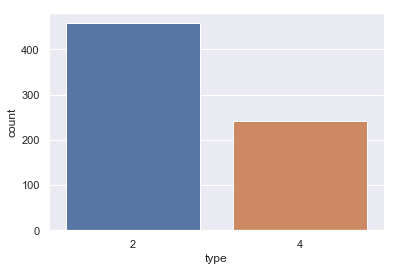

In [12]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df)

### The classes are imbalanced which tells us that accuracy score will not be the best measure to use.

# Prepare X and y


In [13]:
# Column names

df.columns

Index(['ID', 'Clump_Thickness', 'Uniformity_C_Size', 'Uniformity_C_Shape',
       'marg_adhesion', 'single_epthelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitosis', 'type'],
      dtype='object')

In [14]:
# create a Python list of feature names
feature_cols = ['ID', 'Clump_Thickness', 'Uniformity_C_Size', 'Uniformity_C_Shape',
       'marg_adhesion', 'single_epthelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitosis']

# use the list to select a subset of the original DataFrame

X = df[feature_cols]

In [15]:
#remove the 'ID'

X.drop(['ID'],axis=1, inplace=True)

In [16]:
# print the first 5 rows
X.head()


,Clump_Thickness,Uniformity_C_Size,Uniformity_C_Shape,marg_adhesion,single_epthelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [17]:
# Set y
y=df.type

# Naive Bayes Cross Validation



### Asuumptions
- Predictions are independent from each other
- A priori assumption: assumes that past conditions still hold true. When we make predictions from historical data, we well get incorrect results if present situations have changed
- All regression models make the A priori assumption

# Cross Validation on Naive Bayes


In [18]:
# Import packages
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate


In [19]:
NBmodel = GaussianNB()
nb_cross_scores = cross_validate(NBmodel, X, y, cv=10,\
                        scoring=('accuracy', 'roc_auc'), \
                              return_train_score=True)


nb_cross_scores

{'fit_time': array([0.00257683, 0.00201392, 0.0018549 , 0.00521922, 0.00574327,
        0.00365305, 0.00366473, 0.0037539 , 0.00698495, 0.00273824]),
 'score_time': array([0.00324392, 0.00297189, 0.00342417, 0.0040319 , 0.0039978 ,
        0.00276399, 0.00577307, 0.00678396, 0.00438499, 0.0036087 ]),
 'test_accuracy': array([0.91549296, 0.95714286, 0.95714286, 0.9       , 0.98571429,
        0.95714286, 0.97142857, 0.97142857, 0.98550725, 0.97101449]),
 'train_accuracy': array([0.96178344, 0.95707472, 0.96025437, 0.96343402, 0.95389507,
        0.95866455, 0.9554849 , 0.9554849 , 0.95396825, 0.95714286]),
 'test_roc_auc': array([0.96347826, 0.98641304, 0.97192029, 0.96286232, 0.99728261,
        0.98460145, 0.99275362, 0.9990942 , 0.99814815, 0.9875    ]),
 'train_roc_auc': array([0.9880214 , 0.98492237, 0.98738311, 0.98629256, 0.98424008,
        0.9861136 , 0.9855823 , 0.98388215, 0.9843675 , 0.98521552])}

In [20]:
# examine metrics available

for key, value in nb_cross_scores.items() :
    print (key)

fit_time
score_time
test_accuracy
train_accuracy
test_roc_auc
train_roc_auc


## The mean score and the 95% confidence interval:

In [21]:
print("Accuracy: %0.2f (+/- %0.2f)" % (nb_cross_scores['test_accuracy'].mean(), \
                                       nb_cross_scores['test_accuracy'].std() * 2))
print("ROC_AUC: %0.2f (+/- %0.2f)" % (nb_cross_scores['test_roc_auc'].mean(), \
                                       nb_cross_scores['test_roc_auc'].std() * 2))

Accuracy: 0.96 (+/- 0.05)
ROC_AUC: 0.98 (+/- 0.03)


# Cross Validation of SVM

In [22]:
# Support Vector Machine
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC

SVCmodel = SVC()
SVC_cross_scores = cross_validate(SVCmodel, X, y, cv=10,\
                        scoring=('accuracy', 'roc_auc'), \
                              return_train_score=True)


SVC_cross_scores

{'fit_time': array([0.0208168 , 0.012398  , 0.00765705, 0.00698209, 0.01039696,
        0.015239  , 0.02960801, 0.01321197, 0.01599216, 0.01518011]),
 'score_time': array([0.00610423, 0.00286818, 0.00261497, 0.00261593, 0.00645185,
        0.00535512, 0.00498199, 0.00878787, 0.00726986, 0.00819802]),
 'test_accuracy': array([0.88732394, 0.95714286, 0.97142857, 0.88571429, 0.98571429,
        0.97142857, 0.98571429, 0.98571429, 0.98550725, 0.98550725]),
 'train_accuracy': array([0.99840764, 0.99682035, 0.99682035, 0.99841017, 0.99682035,
        0.99682035, 0.99682035, 0.99682035, 0.9952381 , 0.9968254 ]),
 'test_roc_auc': array([0.94608696, 0.99003623, 0.97373188, 0.95833333, 1.        ,
        0.98731884, 0.9990942 , 1.        , 0.99907407, 1.        ]),
 'train_roc_auc': array([1.        , 0.99997763, 1.        , 1.        , 0.99998881,
        1.        , 1.        , 0.99998881, 0.99998884, 0.99998884])}

## The mean score and the 95% confidence interval:

In [23]:
# examine metrics available

for key, value in SVC_cross_scores.items() :
    print (key)

fit_time
score_time
test_accuracy
train_accuracy
test_roc_auc
train_roc_auc


In [24]:
print("Accuracy: %0.2f (+/- %0.2f)" % (SVC_cross_scores['test_accuracy'].mean(), \
                                       SVC_cross_scores['test_accuracy'].std() * 2))
print("ROC_AUC: %0.2f (+/- %0.2f)" % (SVC_cross_scores['test_roc_auc'].mean(), \
                                       SVC_cross_scores['test_roc_auc'].std() * 2))



Accuracy: 0.96 (+/- 0.08)
ROC_AUC: 0.99 (+/- 0.04)


# Model Evaluation


In [25]:
df.type.value_counts()

2    458
4    241
Name: type, dtype: int64

##### The classes were imbalanced. 
- Type 2: 458
- Type 4: 241. 

This means that ROC_AUC is a better evaluation metric.

The SVM barely outperformed the Naive Bayes on ROC_AUC:
    - SVM: 
        - Accuracy: 0.96 (+/- 0.08)
        - ROC_AUC: 0.99 (+/- 0.04)
    - Naive Bayes: Accuracy:
        - Accuracy: 0.96 (+/- 0.05)
        - ROC_AUC: 0.98 (+/- 0.03)

# The Best Model is the SVM. Investigate the model further.

In [26]:
# Test, Train, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [27]:

# Support Vector Machine
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC


# fit a SVM model to the data
model = SVC()
model.fit(X_train, y_train)
print(model)

# make predictions
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        84
           4       0.92      1.00      0.96        56

   micro avg       0.96      0.96      0.96       140
   macro avg       0.96      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140

[[79  5]
 [ 0 56]]


#### Precision: TP/ TP + FP
    -Out of all type 2s predicted (TP + FP), 100% of the predictions were accurate.
#### Recall: TP /  TP + FN
    -Out of all the type 2s in the test set, 0.94 were identified.

# Summary & Conclusions

Let's examine what we accomplished in this notebook:

- Data was loaded.

- Nans were checked for and replaced.

- Two models were run and validated using cross validation.

- Both models were evaluated and performed well.

However, the SVM barely outperformed the Naive Bayes on ROC_AUC:
    - SVM: 
        - Accuracy: 0.96 (+/- 0.08)
        - ROC_AUC: 0.99 (+/- 0.04)
    - Naive Bayes: Accuracy:
        - Accuracy: 0.96 (+/- 0.05)
        - ROC_AUC: 0.98 (+/- 0.03)

The classes were imbalanced, therefore ROC_AUC provideds a better measure.

*** The recommendation is to use the SVM on this dataset to classify benign and malignant tumors. ***
